# Start

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib 
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore, shapiro, probplot, kstest, norm
import openpyxl 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.gofplots import qqplot
from scipy import stats as st
from statsmodels.stats.power import TTestIndPower

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(data['Max HR'], widths=0.7)

ax.set_xlabel('Max HR')
ax.set_ylabel('Value')
ax.set_title('Max HR boxplot')

plt.show()

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Heart_disease_cleaned.csv")
data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


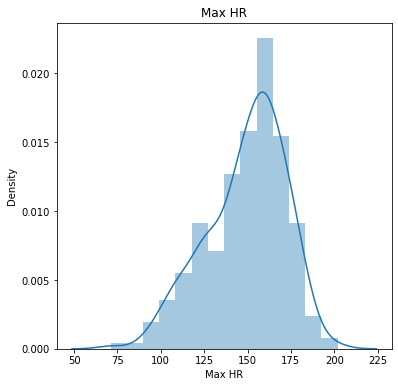

In [139]:
plt.figure(figsize = (6,6))
g = sns.distplot(a = data['Max HR'])
p = plt.title('Max HR')

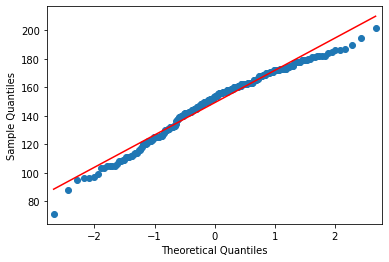

In [140]:
max_hr_data = data['Max HR']

qqplot(max_hr_data, line='s')
plt.show()

In [141]:
stat, p = shapiro(data['Max HR'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Data does not look Gaussian (reject H0)


In [147]:
dist = 'norm'

# perform the Kolmogorov-Smirnov test
stat, p = kstest(data['Max HR'], dist)

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data follows a {} distribution (fail to reject H0)'.format(dist))
else:
    print('Data does not follow a {} distribution (reject H0)'.format(dist))

Data does not follow a norm distribution (reject H0)


# The means of 'Max HR' groups are equal to or greater the normal values of population ?

H0: There is no difference


H1: There is difference

In [ ]:
(
    data
    .groupby(["Age"])
    [["Max HR"]]
    .mean()
)

In [ ]:
age_29_34 = data.loc[data['Age'].between(29,34)]
print(age_29_34)

In [ ]:
age_35_39 = data.loc[data['Age'].between(35,39)]
print(age_35_39)

In [ ]:
age_40_44 = data.loc[data['Age'].between(40,44)]
print(age_40_44)

In [ ]:
age_45_49 = data.loc[data['Age'].between(45,49)]
print(age_45_49)

In [ ]:
age_50_54 = data.loc[data['Age'].between(50,54)]
print(age_50_54)

In [ ]:
age_55_59 = data.loc[data['Age'].between(55,59)]
print(age_55_59)

In [ ]:
age_60_64 = data.loc[data['Age'].between(60,64)]
print(age_60_64)

In [ ]:
age_65_69 = data.loc[data['Age'].between(65,69)]
print(age_65_69)

In [ ]:
age_70_77 = data.loc[data['Age'].between(70,77)]
print(age_70_77)

In [156]:
mean_age_29_34=age_29_34['Max HR'].mean()
mean_age_35_39=age_35_39['Max HR'].mean()
mean_age_40_44=age_40_44['Max HR'].mean()
mean_age_45_49=age_45_49['Max HR'].mean()
mean_age_50_54=age_50_54['Max HR'].mean()
mean_age_55_59=age_55_59['Max HR'].mean()
mean_age_60_64=age_60_64['Max HR'].mean()
mean_age_65_69=age_65_69['Max HR'].mean()
mean_age_70_77=age_70_77['Max HR'].mean()

print(mean_age_29_34)
print(mean_age_35_39)
print(mean_age_40_44)
print(mean_age_45_49)
print(mean_age_50_54)
print(mean_age_55_59)
print(mean_age_60_64)
print(mean_age_65_69)
print(mean_age_70_77)

177.33333333333334
167.55555555555554
160.45945945945945
155.9
150.71698113207546
145.12962962962962
142.56521739130434
140.64285714285714
130.5


# T-Test

In [138]:
st.ttest_1samp(age_29_34['Max HR'],160)

TtestResult(statistic=1.2951522516054672, pvalue=0.3246183664940294, df=2)

In [137]:
st.ttest_1samp(age_35_39['Max HR'],156)

TtestResult(statistic=1.6707501001510217, pvalue=0.13331703791224786, df=8)

In [157]:
st.ttest_1samp(age_40_44['Max HR'],151)

TtestResult(statistic=2.983827637356019, pvalue=0.005087748334152708, df=36)

In [135]:
st.ttest_1samp(age_45_49['Max HR'],147)

TtestResult(statistic=2.7759734113803045, pvalue=0.00953787698502411, df=29)

In [134]:
st.ttest_1samp(age_50_54['Max HR'],143)

TtestResult(statistic=2.404185559590502, pvalue=0.019806579621085268, df=52)

In [133]:
st.ttest_1samp(age_55_59['Max HR'],139)

TtestResult(statistic=2.085072006103825, pvalue=0.0418952768298594, df=53)

In [132]:
st.ttest_1samp(age_60_64['Max HR'],134)

TtestResult(statistic=2.601934136331311, pvalue=0.01250471074300315, df=45)

In [131]:
st.ttest_1samp(age_65_69['Max HR'],130)

TtestResult(statistic=2.5350984747284317, pvalue=0.017344722192491214, df=27)

In [130]:
st.ttest_1samp(age_70_77['Max HR'],124)

TtestResult(statistic=1.0723840547420327, pvalue=0.3114593217777126, df=9)

29-34 ; 35-39 ; 70-77 not reject H0


  40-44 ; 45-49 ; 50-54 ; 55-59 ; 60-64 ; 65-69 reject H0, so accept H1

#Evaluate standard dev and effect size

In [166]:
std_dev1 = age_29_34['Max HR'].std()
count1 = age_29_34['Max HR'].count()
effect_size1 = (mean_age_29_34-160)/std_dev1
print(effect_size1)
print(std_dev1)
print(count1)

0.7477565011059664
23.18045153428495
3


In [167]:
std_dev2 = age_35_39['Max HR'].std()
count2 = age_35_39['Max HR'].count()
effect_size2 = (mean_age_35_39-156)/std_dev2
print(effect_size2)
print(std_dev2)
print(count1)

0.5569167000503406
20.749163303077495
3


In [168]:
std_dev3 = age_40_44['Max HR'].std()
count3 = age_40_44['Max HR'].count()
effect_size3 = (mean_age_40_44-151)/std_dev3
print(effect_size3)
print(std_dev3)
print(count3)

0.4905382418750664
19.283836920238834
37


In [169]:
std_dev4 = age_45_49['Max HR'].std()
count4 = age_45_49['Max HR'].count()
effect_size4 = (mean_age_45_49-147)/std_dev4
print(effect_size4)
print(std_dev4)
print(count4)

0.5068210854825204
17.560437509277534
30


In [174]:
std_dev5 = age_50_54['Max HR'].std()
count5 = age_50_54['Max HR'].count()
effect_size5 = (mean_age_50_54 -143)/std_dev5
print(effect_size5)
print(std_dev5)
print(count5)

0.33024028430264585
23.367776430943536
53


In [173]:
std_dev6 = age_55_59['Max HR'].std()
count6 = age_55_59['Max HR'].count()
effect_size6 = (mean_age_55_59 -139)/std_dev6
print(effect_size6)
print(std_dev6)
print(count6)

0.2837423606619813
21.602800566432766
54


In [172]:
std_dev7 = age_60_64['Max HR'].std()
count7 = age_60_64['Max HR'].count()
effect_size7 = (mean_age_60_64 -134)/std_dev7
print(effect_size7)
print(std_dev7)
print(count7)

0.3836342588468913
22.32651853629873
46


In [171]:
std_dev8 = age_65_69['Max HR'].std()
count8 = age_65_69['Max HR'].count()
effect_size8 = (mean_age_65_69 -130)/std_dev8
print(effect_size8)
print(std_dev8)
print(count8)

0.47908857951361367
22.214800347906674
28


In [170]:
std_dev9 = age_70_77['Max HR'].std()
count9 = age_70_77['Max HR'].count()
effect_size9 = (mean_age_70_77 -124)/std_dev9
print(effect_size9)
print(std_dev9)
print(count9)

0.3391176139431514
19.16739129065009
10


#Power

In [184]:
power_analysis = TTestIndPower()
sample_size = count1
alpha = 0.05
power = power_analysis.power(effect_size=effect_size1, nobs1=sample_size, alpha=alpha)
print('La potenza del test è:', power)

La potenza del test è: 0.11048359076328669


In [183]:
power_analysis = TTestIndPower()
sample_size = count2
alpha = 0.05
power = power_analysis.power(effect_size=effect_size2, nobs1=sample_size, alpha=alpha)
print('La potenza del test è:', power)

La potenza del test è: 0.1991210782317725


In [182]:
power_analysis = TTestIndPower()
sample_size = count3
alpha = 0.05
power = power_analysis.power(effect_size=effect_size3, nobs1=sample_size, alpha=alpha)
print('La potenza del test è:', power)

La potenza del test è: 0.5484698699057025


In [181]:
power_analysis = TTestIndPower()
sample_size = count4
alpha = 0.05
power = power_analysis.power(effect_size=effect_size4, nobs1=sample_size, alpha=alpha)
print('La potenza del test è:', power)

La potenza del test è: 0.48824384570700097


In [180]:
power_analysis = TTestIndPower()
sample_size = count5
alpha = 0.05
power = power_analysis.power(effect_size=effect_size5, nobs1=sample_size, alpha=alpha)
print('La potenza del test è:', power)

La potenza del test è: 0.3915439913623859


In [179]:
power_analysis = TTestIndPower()
sample_size = count5
alpha = 0.05
power = power_analysis.power(effect_size=effect_size5, nobs1=sample_size, alpha=alpha)
print('La potenza del test è:', power)

La potenza del test è: 0.3915439913623859


In [178]:
power_analysis = TTestIndPower()
sample_size = count6
alpha = 0.05
power = power_analysis.power(effect_size=effect_size6, nobs1=sample_size, alpha=alpha)
print('La potenza del test è:', power)

La potenza del test è: 0.3092213830719268


In [177]:
power_analysis = TTestIndPower()
sample_size = count7
alpha = 0.05
power = power_analysis.power(effect_size=effect_size7, nobs1=sample_size, alpha=alpha)
print('La potenza del test è:', power)

La potenza del test è: 0.4445031015826154


In [176]:
power_analysis = TTestIndPower()
sample_size = count8
alpha = 0.05
power = power_analysis.power(effect_size=effect_size8, nobs1=sample_size, alpha=alpha)
print('La potenza del test è:', power)

La potenza del test è: 0.42112499397957015


In [175]:
power_analysis = TTestIndPower()
sample_size = count9
alpha = 0.05
power = power_analysis.power(effect_size=effect_size9, nobs1=sample_size, alpha=alpha)
print('La potenza del test è:', power)

La potenza del test è: 0.1109187688422568
